## Multiple Linear Regression in Python

This dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("C:\\Users\\12103\\Desktop\\Data\\reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

In [6]:
print(X.shape)
print(X.head())

(20433, 8)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  


In [11]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)
Y_pred = reg.predict(X)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y, Y_pred))

Coefficients: 
 [-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]
Mean absolute error: 50799.63


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=11)
reg_2 = linear_model.LinearRegression()
reg_2.fit(X_train, Y_train)
# Predict using training set
Y_train_pred = reg_2.predict(X_train)
# Predict using test set
Y_test_pred = reg_2.predict(X_test)
# The mean squared errors
print("Mean absolute error train: %.2f"
      % mean_absolute_error(Y_train, Y_train_pred))
print("Mean absolute error test: %.2f"
      % mean_absolute_error(Y_test, Y_test_pred))

Mean absolute error train: 50749.10
Mean absolute error test: 50916.74


In [116]:
print(X_train.corr(method='pearson'))

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925627           -0.111272     0.042788   
latitude            -0.925627  1.000000            0.013098    -0.034147   
housing_median_age  -0.111272  0.013098            1.000000    -0.356534   
total_rooms          0.042788 -0.034147           -0.356534     1.000000   
total_bedrooms       0.069305 -0.066424           -0.316644     0.927454   
population           0.101596 -0.109600           -0.294652     0.859323   
households           0.056116 -0.070537           -0.298702     0.916556   
median_income       -0.020466 -0.074943           -0.115736     0.198486   
average_bedrooms     0.017548  0.062059           -0.077163     0.036170   
average_rooms       -0.027099  0.104294           -0.158539     0.146227   
average_population   0.011811 -0.002330            0.012569    -0.031031   

                    total_bedrooms  population  households  median_income  \
longitude 

## Independent variables having correlation greater than 0.9 w.r.t 'households': population, total_bedrooms, and total_rooms



In [117]:
# average_bedrooms = total_bedrooms/households
X_train['average_bedrooms'] = X_train['total_bedrooms']/X_train['households']
X_test['average_bedrooms'] = X_test['total_bedrooms']/X_test['households']
#average_rooms = total_rooms/households
X_train['average_rooms'] = X_train['total_rooms']/X_train['households']
X_test['average_rooms'] = X_test['total_rooms']/X_test['households']
#average_population = population/households
X_train['average_population'] = X_train['population']/X_train['households']
X_test['average_population'] = X_test['population']/X_test['households']


print(X_train.corr(method='pearson'))

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925627           -0.111272     0.042788   
latitude            -0.925627  1.000000            0.013098    -0.034147   
housing_median_age  -0.111272  0.013098            1.000000    -0.356534   
total_rooms          0.042788 -0.034147           -0.356534     1.000000   
total_bedrooms       0.069305 -0.066424           -0.316644     0.927454   
population           0.101596 -0.109600           -0.294652     0.859323   
households           0.056116 -0.070537           -0.298702     0.916556   
median_income       -0.020466 -0.074943           -0.115736     0.198486   
average_bedrooms     0.017548  0.062059           -0.077163     0.036170   
average_rooms       -0.027099  0.104294           -0.158539     0.146227   
average_population   0.011811 -0.002330            0.012569    -0.031031   

                    total_bedrooms  population  households  median_income  \
longitude 

## Observation: The new variables (average_bedrooms, average_rooms, and average_population) are not correlated with households.

In [27]:
reg_3 = linear_model.LinearRegression()
reg_3.fit(X_train, Y_train)
# Predict using training set
Y_train_pred = reg_3.predict(X_train)
# Predict using test set
Y_test_pred = reg_3.predict(X_test)
# The mean squared errors
print("Mean absolute error train: %.2f"
      % mean_absolute_error(Y_train, Y_train_pred))
print("Mean absolute error test: %.2f"
      % mean_absolute_error(Y_test, Y_test_pred))

Mean absolute error train: 50474.27
Mean absolute error test: 50783.97


# Ridge and Lasso Regression 

Using the same data as before. 

Scaled the data so that the independent variables have zero mean and unit variance.  
The reason we scale the data before regularization because the constraint value depends on the magnitude of each variable. If the independent variables does not have the same scale, the shrinking is not similar across the variables and thus the coefficients of your regularization will be dependent on the units of your variables. Obviously it is not good to have your model differ depending on what units being used because that's an arbitrary standard. 

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale

column_names = list(X_train.columns.values)

X_train_scaled = scale(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = column_names)
X_test_scaled = scale(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = column_names)


## Using sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). 
For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$.


In [95]:
from sklearn.model_selection import cross_val_score
import numpy as np

alphas =  10**np.linspace(10,-2,100)*0.5
n_folds = 5

lasso_cv_scores = []
ridge_cv_scores = []

for alpha in alphas:
    # Lasso CV
    lasso_clf = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_clf, X_train_scaled, Y_train, cv=n_folds, scoring='neg_mean_absolute_error')
    lasso_cv_scores.append(scores.mean())
    
    # Ridge CV
    ridge_clf = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_clf, X_train_scaled, Y_train, cv=n_folds, scoring='neg_mean_absolute_error')
    ridge_cv_scores.append(scores.mean())    
    

# Alpha with lowest mean absolute error for Lasso
lasso_idx_min_score = lasso_cv_scores.index(max(lasso_cv_scores))
print("Alpha with lowest mean absolute error for Lasso: %.4f"
      % alphas[lasso_idx_min_score])

# Alpha with lowest mean absolute error for Ridge
ridge_idx_min_score = ridge_cv_scores.index(max(ridge_cv_scores))
print("Alpha with lowest mean absolute error for Ridge: %.4f"
      % alphas[ridge_idx_min_score])



Alpha with lowest mean absolute error for Lasso: 0.0050
Alpha with lowest mean absolute error for Ridge: 37.8232


In [124]:
from matplotlib import pyplot as plt
#Plotting ridge coefficents as a function of the regularization

ridge_alpha_list = list()
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, Y_train)
    ridge_alpha_list.append(ridge.coef_)
    Y_train_pred = ridge.predict(X_train_scaled)        

df_ridge = pd.DataFrame(np.array(ridge_alpha_list),columns = column_names)
df_ridge.set_index(alphas)

df_ridge.plot()
plt.show()


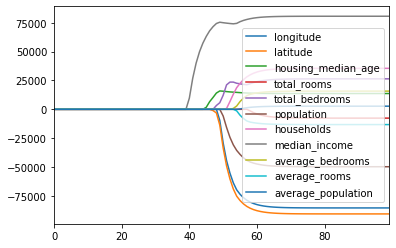

In [120]:
#Plotting lasso coefficents as a function of the regularization
lasso_alpha_list = list()
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, Y_train)
    lasso_alpha_list.append(lasso.coef_)
    Y_train_pred = lasso.predict(X_train_scaled)        

df_lasso = pd.DataFrame(np.array(lasso_alpha_list),columns = column_names)
df_lasso.set_index(alphas)

df_lasso.plot()
plt.show()

In [113]:
# Least Squares Regression
new_reg = linear_model.LinearRegression()
new_reg.fit(X_train_scaled, Y_train)
# Predict using test set
Y_test_scaled_pred = new_reg.predict(X_test_scaled)
print("Least squares mean absolute error test: %.4f"
      % mean_absolute_error(Y_test, Y_test_scaled_pred))

# Lasso
new_lasso = Lasso(alpha=alphas[lasso_idx_min_score])
new_lasso.fit(X_train_scaled, Y_train)
# Predict using test set
Y_test_scaled_pred = new_lasso.predict(X_test_scaled)
print("Lasso mean absolute error test with (alpha=0.005) : %.4f"
      % mean_absolute_error(Y_test, Y_test_scaled_pred))

# Lasso
new_ridge = Ridge(alpha=alphas[ridge_idx_min_score])
new_ridge.fit(X_train_scaled, Y_train)
# Predict using test set
Y_test_scaled_pred = new_ridge.predict(X_test_scaled)
print("Ridge mean absolute error test with (alpha=37.8232) : %.4f"
      % mean_absolute_error(Y_test, Y_test_scaled_pred))


Least squares mean absolute error test: 50682.3976
Lasso mean absolute error test with (alpha=0.005) : 50682.3972
Ridge mean absolute error test with (alpha=37.8232) : 50635.1150


## Running lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). 

In [110]:
#Fitting LassoCV
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(X_train_scaled, Y_train)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [111]:
#Print the alpha parameter obtained above
print("Using LassoCV the best alpha is: %.4f"
      % lassocv.alpha_)

Using LassoCV the best alpha is: 161.8017


In [115]:
#Fit lasso using the above alpha and report MAE on Test.
best_lasso = Lasso(alpha=lassocv.alpha_)
best_lasso.fit(X_train_scaled, Y_train)
# Predict using test set
Y_test_scaled_pred = best_lasso.predict(X_test_scaled)
print("Lasso mean absolute error test (with alpha=161.8017) : %.4f"
      % mean_absolute_error(Y_test, Y_test_scaled_pred))

# The coefficients
print('Coefficients: \n', best_lasso.coef_)

Lasso mean absolute error test (with alpha=161.8017) : 50681.9500
Coefficients: 
 [-83729.40788737 -88966.60778197  13793.24655891  -5441.52359581
  24891.29887821 -48359.51663192  33593.70067617  79916.03828368
  14815.92067716 -12517.52849661   2360.88791625]


The test performance and accuracy of the model improves as the number of examples in the training dataset increases. As training dataset increases in the number of examples the training error will increase, but the test error will decrease. The test error will decrease because are model is improving at prediction as we get more examples. The model becomes more realistic. The training error will increase because with more examples finding a better fit and minimizing the error becomes harder.